<a href="https://colab.research.google.com/github/saum1500/Stock-Prediction-in-Python/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import mplfinance as mpf

In [93]:
#getting data from yahoo  storing it in a csv and then reading it as a pandas dataframe
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,12,31)
df = web.DataReader('AAPL', 'yahoo', start,end)
df.to_csv('apple.csv')
df = pd.read_csv('apple.csv',parse_dates = True, index_col =0)
print(df.shape) #5031 trading days are in this dataset
df.head()

(5031, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,3.460857
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,3.169071
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,3.215448
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.937188
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600.0,3.076317


In [94]:
# getting moving averages of 100 days
df['100 days Moving Average'] = df['Adj Close'].rolling(window=100).mean()
df.dropna(inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close,100 days Moving Average
Date,,,,,,,
2000-05-24,3.205357,2.964286,3.078125,3.131696,169615600.0,2.711102,3.545384
2000-05-25,3.309152,3.071429,3.160714,3.116629,101687600.0,2.698057,3.537756
2000-05-26,3.209821,3.044643,3.142857,3.084821,45287200.0,2.670522,3.532770
2000-05-30,3.147321,2.919643,3.129464,3.127232,178264800.0,2.707237,3.527688
2000-05-31,3.258929,2.993304,3.102679,3.000000,108376800.0,2.597093,3.524287


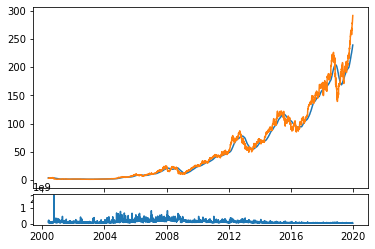

In [95]:
# visualizing the moving averages using subplots which are called axes
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1) #(6,1) -> 6 rows, 1 column (grid size), (0,0) starting coordinate
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1) #sharex actually makes their x axes separate

ax1.plot(df.index, df['100 days Moving Average'])
ax1.plot(df.index, df['Adj Close'])
ax2.plot(df.index,df['Volume'])
plt.show()

In [99]:
 # creating a resampled dataset, the resample function is used to resample timeseries data
 df_resampled = df['Adj Close'].resample('20D').ohlc() # ohlc does not sum or mean the values of 20 days, but takes the open high low close data
 df_resampled['Volume'] = df['Volume'].resample('20D').mean()
 df_resampled.columns=['Open', 'High','Low','Close','Volume']
 print(df_resampled.head())
 print(df_resampled.shape) # condensed to 717 entries.


                Open      High       Low     Close        Volume
Date                                                            
2000-05-24  2.711102  2.985497  2.597093  2.819314  1.168655e+08
2000-06-13  2.921729  3.439602  2.796125  3.238636  7.930580e+07
2000-07-03  3.296607  3.640566  3.192259  3.312065  7.543470e+07
2000-07-23  3.010617  3.215448  2.890811  2.948782  6.097532e+07
2000-08-12  2.910135  3.768103  2.886945  3.768103  6.249990e+07
(359, 5)


In [0]:
# making the dataset compatible to ohlc charting by creating an index and creating mdates 
#df_resampled.reset_index(inplace=True) # makes dates a column and creates a separate index
#df_resampled['mDate'] = df_resampled['Date'].map(mdates.date2num)
#df_resampled.head(4)

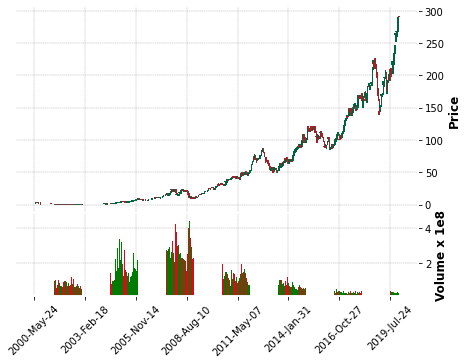

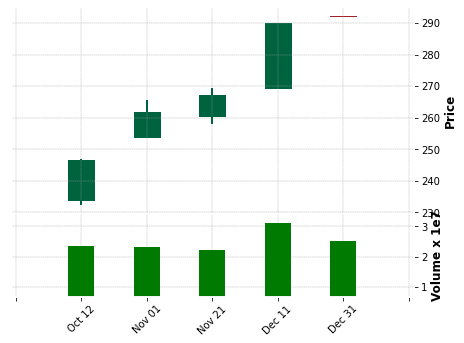

In [107]:
mpf.plot(df_resampled, type = 'candle', style='charles', volume=True)
mpf.plot(df_resampled.tail(), type = 'candle', style='charles', volume=True) # to show the zomed in version